In [13]:
!pip install keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [15]:
#Load training data
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


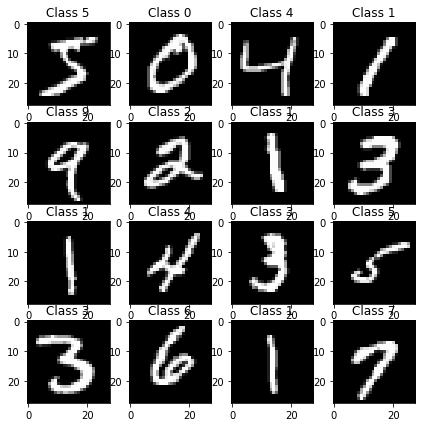

In [17]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [18]:
#Format the data for training
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [0]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [0]:
#Build the neural network
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [22]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [25]:
model.fit(X_train, Y_train, batch_size=100, nb_epoch=4, verbose=1)

Epoch 1/4
  700/60000 [..............................] - ETA: 12s - loss: 0.1217 - acc: 0.9671

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 12s 197us/step - loss: 0.1052 - acc: 0.9668
Epoch 2/4
60000/60000 [==============================] - 12s 195us/step - loss: 0.0747 - acc: 0.9763
Epoch 3/4
60000/60000 [==============================] - 11s 188us/step - loss: 0.0587 - acc: 0.9815
Epoch 4/4
60000/60000 [==============================] - 12s 197us/step - loss: 0.0458 - acc: 0.9852


In [26]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.07331850153744454
Test accuracy: 0.9784


In [0]:
# Inspecting the output

# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [28]:
incorrect_indices

array([  73,  151,  193,  241,  247,  259,  264,  274,  320,  321,  359,
        445,  448,  479,  495,  530,  582,  646,  659,  684,  720,  846,
        874,  877,  882,  951,  965, 1014, 1039, 1044, 1045, 1050, 1112,
       1156, 1226, 1232, 1247, 1260, 1272, 1319, 1328, 1393, 1494, 1500,
       1530, 1549, 1551, 1553, 1554, 1709, 1732, 1754, 1790, 1800, 1901,
       1941, 1952, 1992, 2024, 2035, 2043, 2098, 2109, 2118, 2135, 2185,
       2189, 2224, 2237, 2272, 2293, 2339, 2369, 2387, 2406, 2414, 2422,
       2488, 2597, 2607, 2648, 2654, 2720, 2721, 2743, 2760, 2863, 2877,
       2921, 2927, 2939, 3005, 3030, 3062, 3117, 3369, 3384, 3422, 3451,
       3475, 3503, 3520, 3558, 3567, 3597, 3702, 3776, 3780, 3808, 3850,
       3869, 3926, 3941, 3970, 3976, 3984, 3985, 4000, 4027, 4065, 4078,
       4176, 4205, 4224, 4248, 4259, 4280, 4289, 4314, 4350, 4369, 4405,
       4425, 4477, 4497, 4500, 4505, 4536, 4547, 4571, 4615, 4690, 4740,
       4761, 4807, 4823, 4880, 4966, 5331, 5457, 56

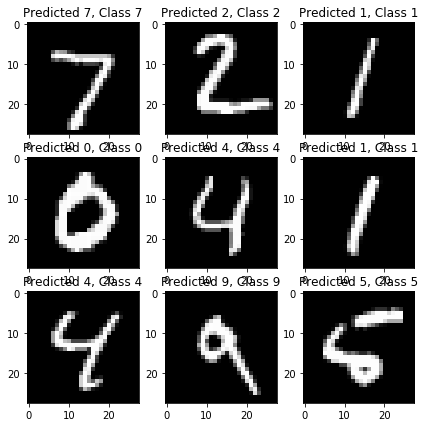

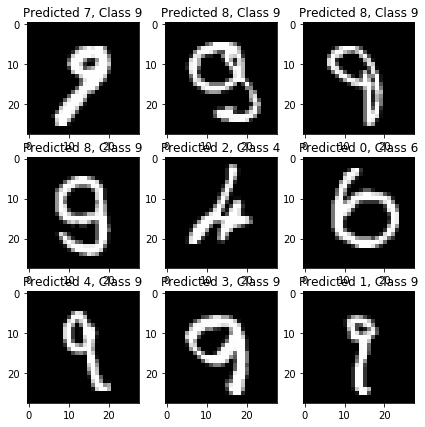

In [29]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

In [0]:
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('relu')) 
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax')) 

In [34]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               78500     
_________________________________________________________________
activation_15 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_16 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
_________________________________________________________________
activation_17 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               5100      
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [36]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=4, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/4
60000/60000 [==============================] - 3s 55us/step - loss: 0.3565 - acc: 0.8946
Epoch 2/4
60000/60000 [==============================] - 3s 46us/step - loss: 0.1389 - acc: 0.9586
Epoch 3/4
60000/60000 [==============================] - 3s 46us/step - loss: 0.0986 - acc: 0.9699
Epoch 4/4
60000/60000 [==============================] - 3s 46us/step - loss: 0.0805 - acc: 0.9746


In [37]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.10668605035692454
Test accuracy: 0.9683
